In [2]:
from gevent import monkey
monkey.patch_all()
from requests_html import HTMLSession
import pandas as pd
from bs4 import BeautifulSoup as bs
import grequests
import requests
import datetime
import numpy as np
import unidecode
from textblob import TextBlob as tb
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
import nltk
from random import sample
from flask import request, jsonify
from selenium import webdriver
import time

c:\users\bahyh\appdata\local\programs\python\python37\lib\site-packages\grequests.py:21: MonkeyPatchWarning: Patching more than once will result in the union of all True parameters being patched
  curious_george.patch_all(thread=False, select=False)
c:\users\bahyh\appdata\local\programs\python\python37\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [3]:
nltk.download("stopwords")

The history saving thread hit an unexpected error (This operation would block forever
	Hub: <Hub '' at 0x1cbd4f8ce88 default pending=0 ref=0 thread_ident=0x3ca0>
	Handles:
[HandleState(handle=<cdata 'struct uv_handle_s *' 0x000001CBC213C218>, type=b'check', watcher=<loop at 0x1cbd4fbb748 default pending=0 ref=0>, ref=0, active=1, closing=0),
 HandleState(handle=<cdata 'struct uv_handle_s *' 0x000001CBC195C6E8>, type=b'timer', watcher=<loop at 0x1cbd4fbb748 default pending=0 ref=0>, ref=0, active=1, closing=0),
 HandleState(handle=<cdata 'struct uv_handle_s *' 0x000001CBC213C638>, type=b'prepare', watcher=<loop at 0x1cbd4fbb748 default pending=0 ref=0>, ref=0, active=1, closing=0),
 HandleState(handle=<cdata 'struct uv_handle_s *' 0x000001CBC213DC38>, type=b'check', watcher=<loop at 0x1cbd4fbb748 default pending=0 ref=0>, ref=1, active=0, closing=0)]).History will not be written to the database.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bahyh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\bahyh\appdata\local\programs\python\python37\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


## Results All

In [5]:
df = pd.concat([pd.read_csv("tes_44.csv"), pd.read_csv("tes_100.csv")]\
              ).iloc[:,1:].drop_duplicates()

In [6]:
df.shape

(100, 13)

In [7]:
df.head()

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
0,CV.ASIATRIPINDONESIA,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{},http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,30.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{'https://www.blooming-lotus-yoga.com/graduate...,https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,1.0,1.0,0.0,0.0,0.0,100.0,0.0,{},https://www.simplymii.com/,APPROVED


In [8]:
rejected = df[df.label =='REJECTED']

In [9]:
# rejected = pd.read_csv("tes_rejected.csv").iloc[:, 1:]

In [10]:
df.groupby("label").size()

label
APPROVED    68
REJECTED    21
REVIEWED    11
dtype: int64

In [13]:
rejected[['merchant_name', 'broken_link_score', 'website', 'broken_links']]

,merchant_name,broken_link_score,website,broken_links
7,YoYoMats,0.000000,https://yoyomatsindonesia.myshopify.com,{}
10,SisilShop,0.000000,SisilShop.com,{}
11,GammaMedia,0.000000,http://gammamedia.co.id,{}
12,ShinhwaGlobalSakuraBear,0.000000,http://www.shinhwaglobalsakurabearinternationa...,{}
13,Gitra,25.000000,s.id/StartFromTheBottom,{'https://s.id/auth/signup': 'No Response/Time...
14,Putrimitsubishi,0.000000,Www.mitsubishiputribali.com,{}
15,TokoReza999,0.000000,www.sdntamunti.com,{}
16,wiraswasta,0.000000,www.aikagames.com,{}
17,BarokahLumintu,100.000000,Www.Klink.com,No hyperlinks gathered
18,MerahHitam,0.000000,Merahhitam.com,{}


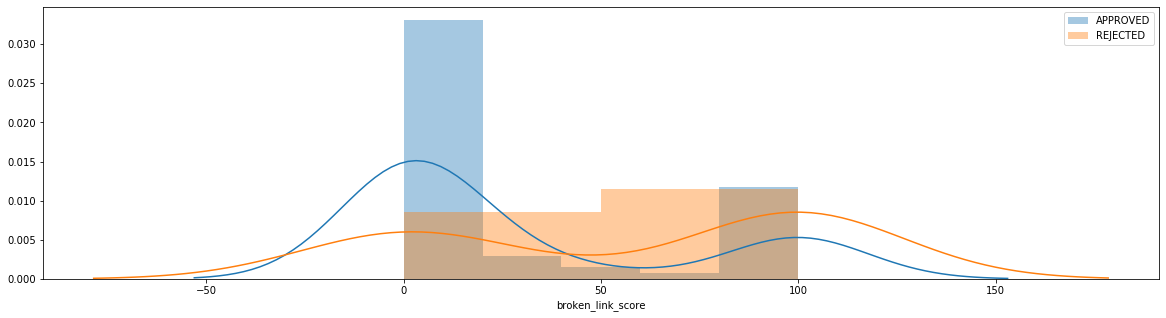

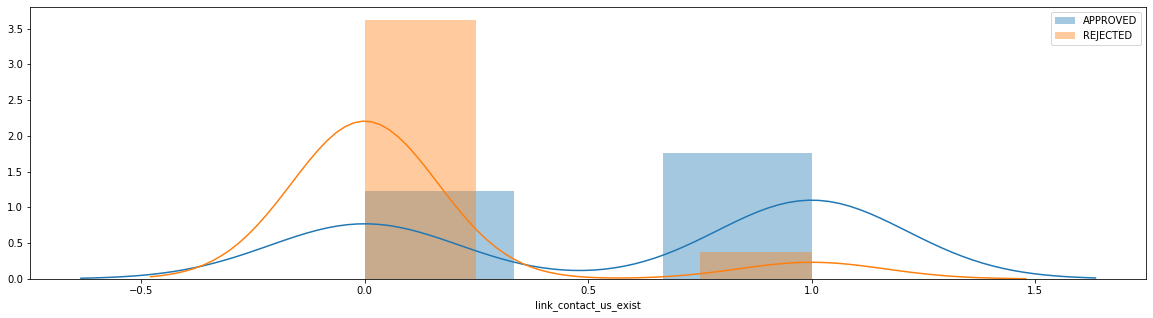

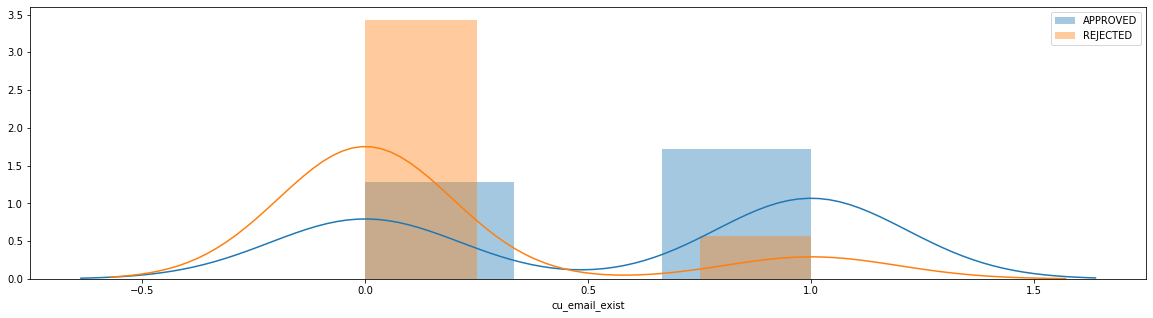

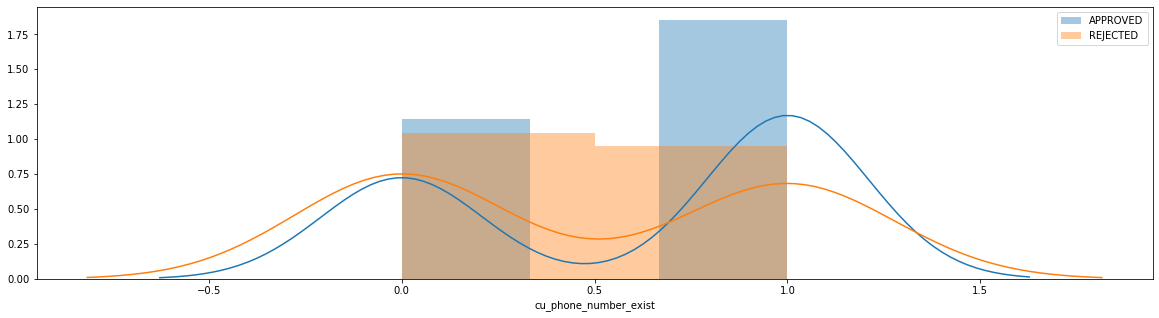

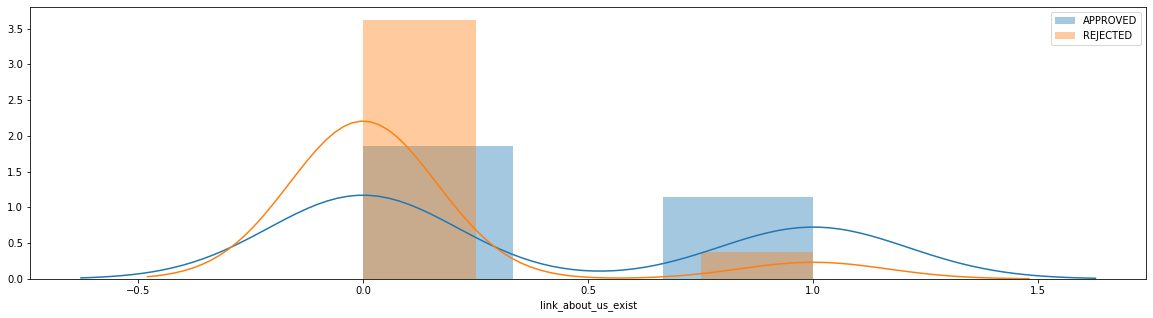

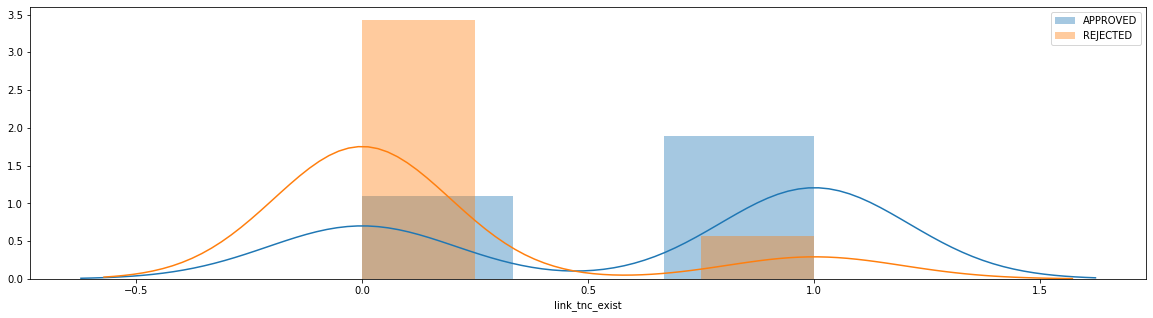

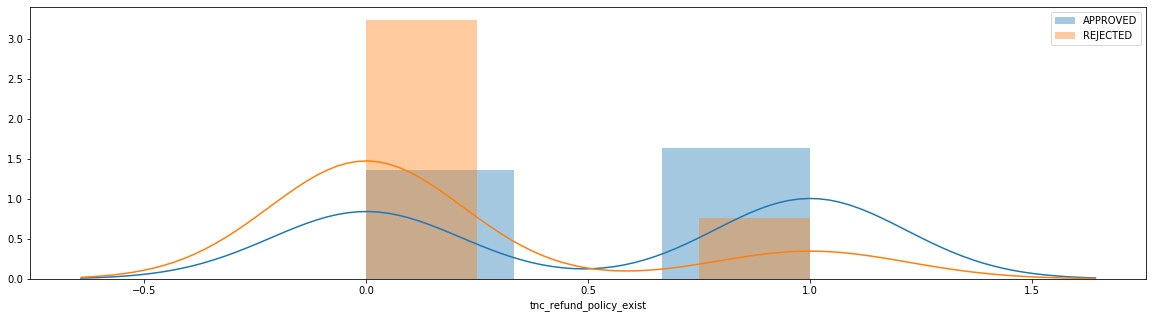

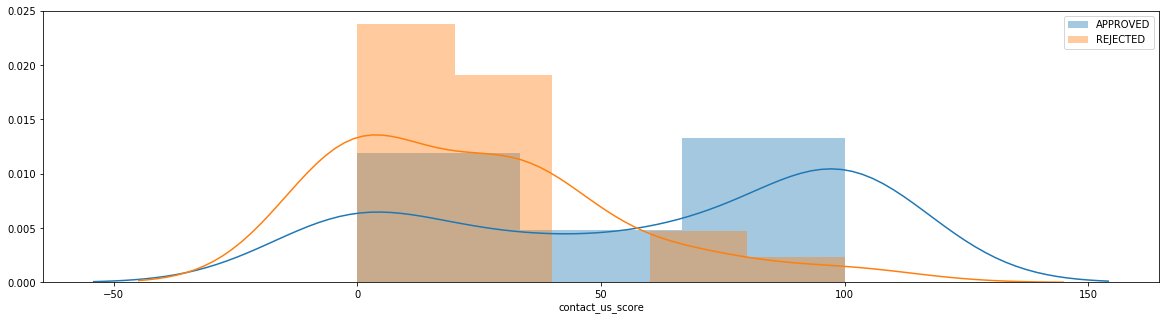

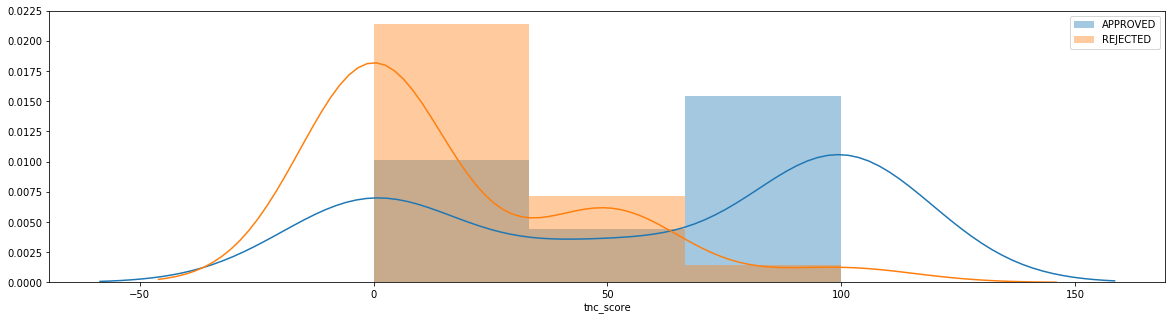

c:\users\bahyh\appdata\local\programs\python\python37\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:
Traceback (most recent call last):
  File "src\gevent\_abstract_linkable.py", line 134, in gevent.__abstract_linkable.AbstractLinkable._notify_links
greenlet.error: cannot switch to a different thread
2020-02-25T12:08:10Z (<built-in method switch of greenlet.greenlet object at 0x000002565A55E0F8>, <gevent._event.Event object at 0x00000256715D1468>) failed with error



In [112]:
for column in df:
    if not (column == 'merchant_name' or column == 'label' \
            or column == 'website' or column == 'broken_links'):
        plt.figure(figsize=(20,5))
        sns.distplot(df[df.label == 'APPROVED'][column], label = 'APPROVED')
        sns.distplot(rejected[column], label = 'REJECTED')
#         sns.distplot(df[df.label == 'REVIEWED'][column], label = 'REVIEWED')
        plt.legend()
        plt.show()

In [105]:
df[df.label == 'REJECTED'].to_csv("rejected_df.csv")

In [99]:
url = "http://gammamedia.co.id	"

In [100]:
test = df[df.website == url]

In [101]:
test

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label


In [102]:
url = url_format_handler(url)

In [104]:
hyperlinks = get_hyperlinks(url)

Gathering hyperlinks...


ConnectionError: HTTPConnectionPool(host='gammamedia.co.id%09', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025674BADC48>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

Traceback (most recent call last):
  File "src\gevent\_abstract_linkable.py", line 134, in gevent.__abstract_linkable.AbstractLinkable._notify_links
greenlet.error: cannot switch to a different thread
2020-02-25T11:46:00Z (<built-in method switch of greenlet.greenlet object at 0x000002565A55E0F8>, <gevent._event.Event object at 0x00000256741056A8>) failed with error



In [97]:
hyperlinks

['https://www.shopify.com/admin/settings/domains',
 'https://www.shopify.com',
 'https://exchangemarketplace.com/?utm_source=ExpiredDomainLink&utm_medium=textlink&utm_campaign=ExpiredDomainLink&utm_content=footer',
 'https://www.shopify.com/oberlo?utm_source=ExpiredDomainLink&utm_medium=textlink&utm_campaign=ExpiredDomainLink',
 'https://www.shopify.com?utm_source=ExpiredDomainLink&utm_medium=textlink&utm_campaign=ExpiredDomainLink',
 'https://exchangemarketplace.com/?utm_source=ExpiredDomainLink&utm_medium=textlink&utm_campaign=ExpiredDomainLink&utm_content=header',
 'https://www.shopify.com/?utm_source=ExpiredDomainLink&utm_medium=textlink&utm_campaign=ExpiredDomainLink']

In [98]:
broken_link_score(test, hyperlinks)

Checking broken link...
[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]
0
Broken links checked.



,merchant_name,broken_link_score,broken_links
0,YoYoMats,0.0,{}


Traceback (most recent call last):
  File "c:\users\bahyh\appdata\local\programs\python\python37\lib\site-packages\gevent\_ffi\loop.py", line 446, in _run_callbacks
    callback(*args)
  File "src\gevent\_abstract_linkable.py", line 114, in gevent.__abstract_linkable.AbstractLinkable._notify_links
  File "src\gevent\_abstract_linkable.py", line 148, in gevent.__abstract_linkable.AbstractLinkable._notify_links
AssertionError
2020-02-25T11:44:36Z <callback at 0x25674c2cbc8 args=()> failed with AssertionError



In [78]:
def broken_link_score(df, hyperlinks):
    """Return score (percentage) of broken link in a website"""

    print("Checking broken link...")
    avoid = pd.Series(hyperlinks).str.contains("wa.me") | pd.Series(hyperlinks).str.contains("youtube") | \
    pd.Series(hyperlinks).str.contains("linkedin") | pd.Series(hyperlinks).str.contains("facebook") | \
    pd.Series(hyperlinks).str.contains("cloudflare") | pd.Series(hyperlinks).str.contains("twitter") | \
    pd.Series(hyperlinks).str.contains("github") | pd.Series(hyperlinks).str.contains("instagram") | \
    pd.Series(hyperlinks).str.contains("tokopedia") | pd.Series(hyperlinks).str.contains("bukalapak") | \
    pd.Series(hyperlinks).str.match("tel") | pd.Series(hyperlinks).str.contains("gitlab") | \
    pd.Series(hyperlinks).str.contains("Tel") | pd.Series(hyperlinks).str.contains("jobstreet") | \
    pd.Series(hyperlinks).str.contains("download") | pd.Series(hyperlinks).str.contains("google") | \
    pd.Series(hyperlinks).str.contains("javaScript") | pd.Series(hyperlinks).str.contains("_blank")

    hyperlinks = list(pd.Series(hyperlinks)[~avoid].values)
    if len(hyperlinks) > 10:
        hyperlinks = sample(hyperlinks, 10)
    rs = (grequests.get(x, \
        headers = {}, \
        timeout=10) for x in hyperlinks)
    rs_res = grequests.map(rs, size = 3)
    
    broken_links = {}
    i = 0
    if len(hyperlinks) == 1 and hyperlinks[0] == "":
        broken_links = "No hyperlinks gathered"
    else:
        for response in rs_res:
            if str(response) != '<Response [200]>':
                try:
                    broken_links[response.request.url] = str(response)
                except:
                    broken_links[hyperlinks[i]] = 'No Response/Timeout'
            i += 1

    status_not_ok = np.count_nonzero(np.array(rs_res, dtype=str) != '<Response [200]>')
    print(rs_res)
    print(status_not_ok)
    status_length = len(rs_res)

#     try:
    score = status_not_ok/status_length*100
#     except:
#         score = 100

    res_df = pd.DataFrame({"merchant_name": df['merchant_name'].values[0], "broken_link_score": score,\
                           "broken_links": str(broken_links)}, index=[0])

    print("Broken links checked.\n")

    return res_df

c:\users\bahyh\appdata\local\programs\python\python37\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [87]:
def get_hyperlinks(url):
    """Return all absolute hyperlinks within the home url"""

    print("Gathering hyperlinks...")
    base_url = url_format_handler(url)
    session = HTMLSession()
#     try:
    r = session.get(base_url, allow_redirects=False, timeout=10)
    res = list(r.html.absolute_links)

    ## If r-html anchor failed, concate manually
    res_final = []
    for url in res:
        if not str(url).startswith("http"):  
            res_final.append(str(base_url + url))
        else:
            res_final.append(str(url))

    if len(res) == 0 or len(res_final) == 0:
        res = [""]
    else:
        res = res_final
#     except:
#         res = [""]

    print("Hyperlinks gathered.\n")

    return res

In [38]:
def url_format_handler(url):
    """Return url with http/https prefix if not written"""

    if not url.startswith("http") and not url.startswith("https"):
        url = "http://" + url

    return url